In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from scipy.ndimage import label
import scipy.ndimage.measurements
import os
import pandas as pd

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
def plotblackwhite(image):
    imgplt=plt.imshow(image, cmap="gray")
    plt.colorbar()
    plt.show()
    #plt.savefig("soho1264_070205_1742_2_BW_RGB.png", dpi=1000)

In [4]:
def plotbwr(diff):
    imgplot=plt.imshow(diff, cmap="bwr")
    plt.colorbar()
    imgplot.set_clim(-255,255)
    plt.show()
    #plt.savefig("soho1264_070205_1718_DIFF_1742_3_BWR.png", dpi=1000)

In [5]:
def plotblodges(l):
    imgplt=plt.imshow(l)
    imgplt.set_clim(0,11)
    imgplt.set_cmap("gray")
    plt.colorbar()
    plt.show()

In [8]:
listofimages = os.listdir("D:/Documents/GitHub/cometsCopy/soho1264")
new_list = [item for item in listofimages if item[-4:] == '.gif']

C:\Users\user\AppData\Local\Temp\ipykernel_2196\3713571988.py:27: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  l1, n1 = label(d1, scipy.ones((3,3)))
C:\Users\user\AppData\Local\Temp\ipykernel_2196\3713571988.py:28: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  l2, n2 = label(d2, scipy.ones((3,3)))
C:\Users\user\AppData\Local\Temp\ipykernel_2196\3713571988.py:35: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  centres1=scipy.ndimage.measurements.center_of_mass(d1,l1,range(1,n1+1))
C:\Users\user\AppData\Local\Temp\ipykernel_2196\3713571988.py:36: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  centres2=scipy.ndimage.measurements.center_of_mass(d2,l2,range(1,n2+1))


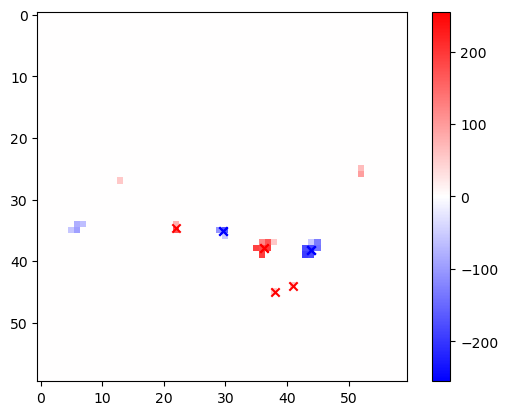

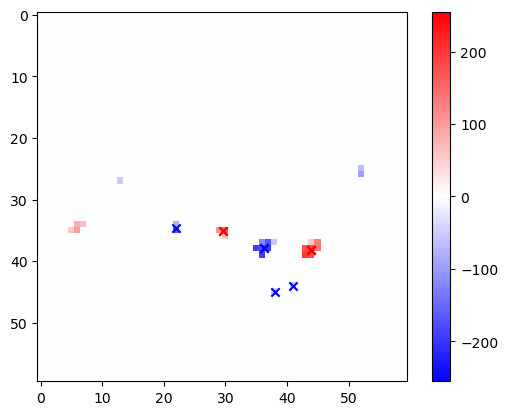

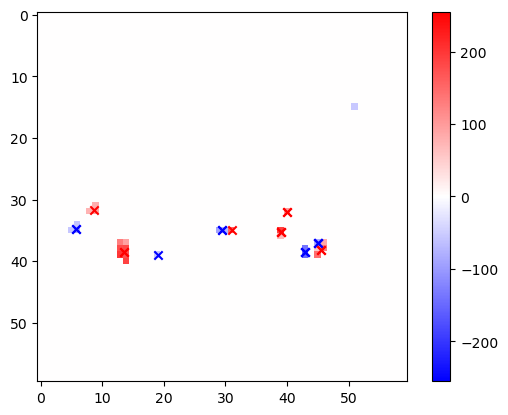

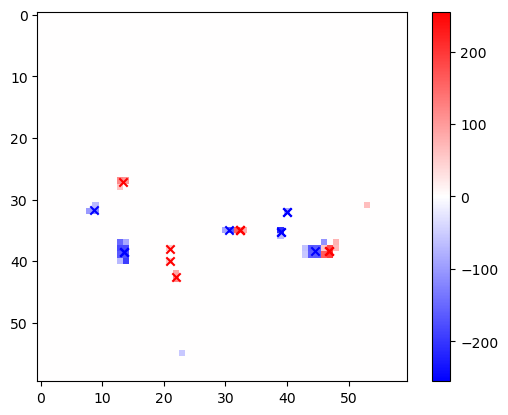

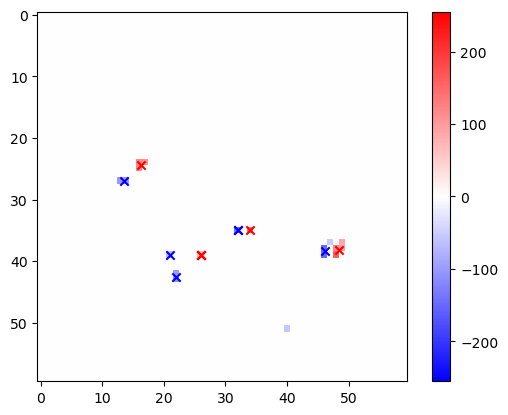

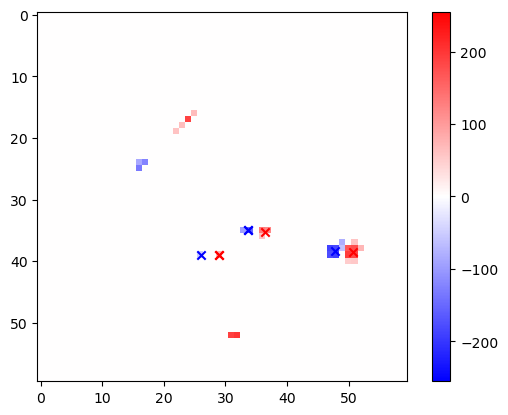

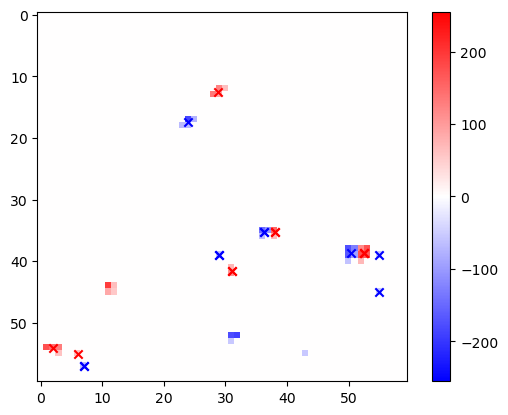

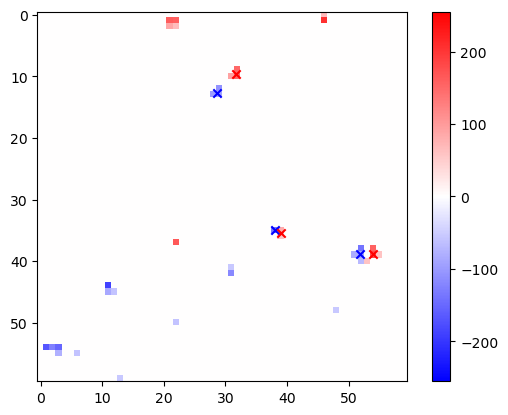

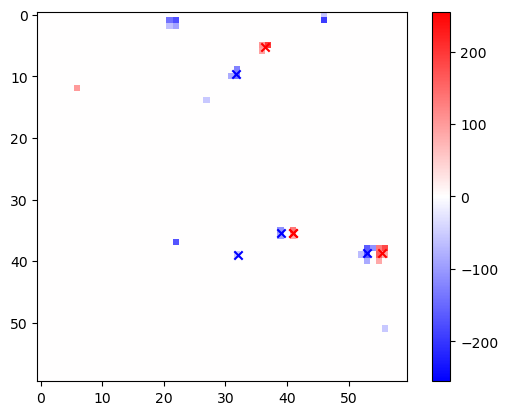

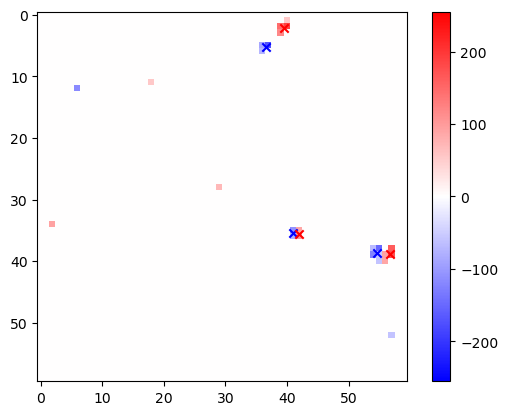

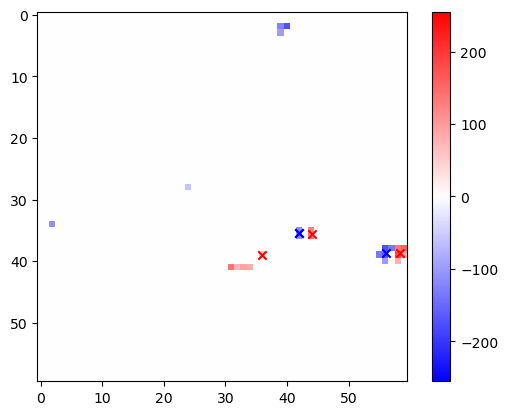

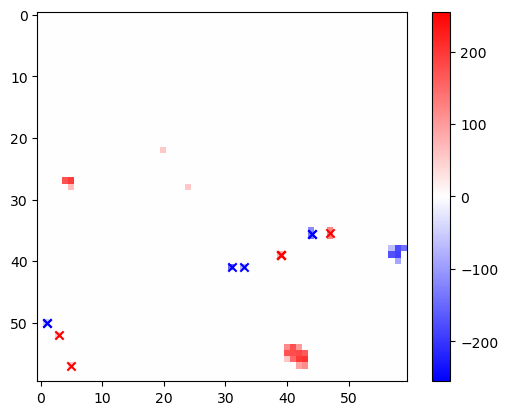

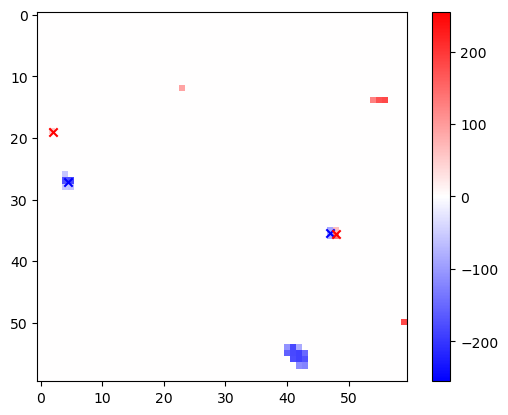

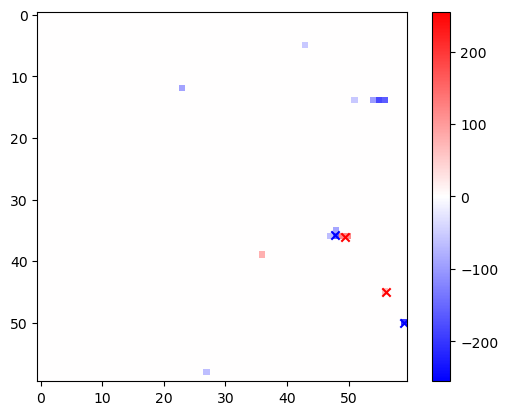

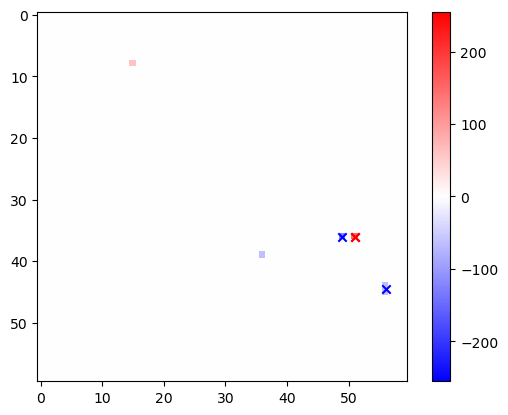

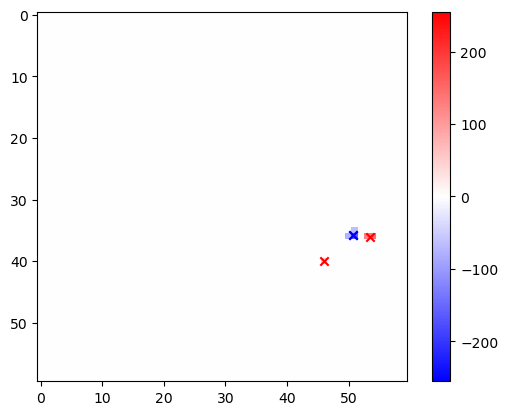

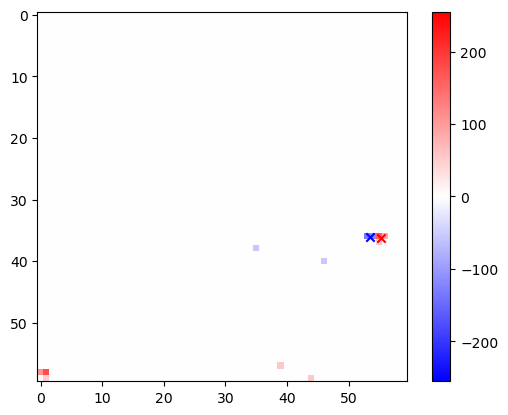

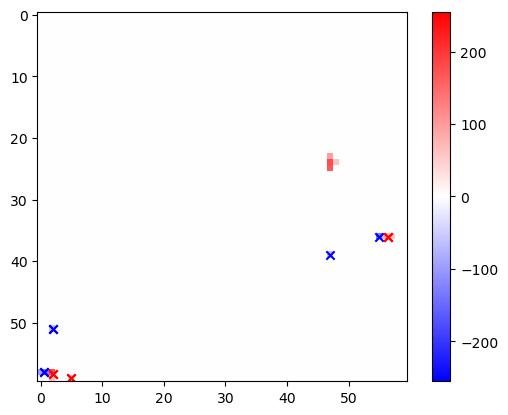

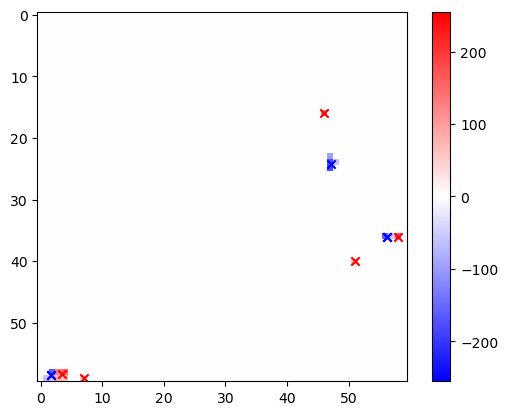

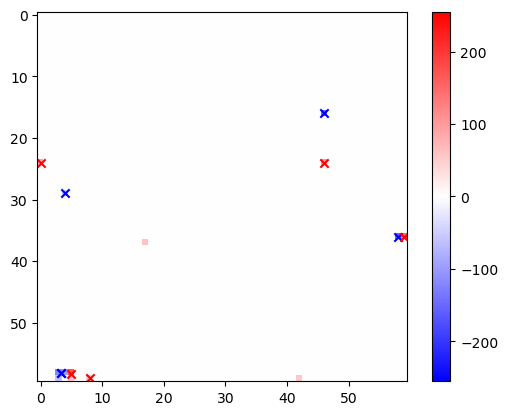

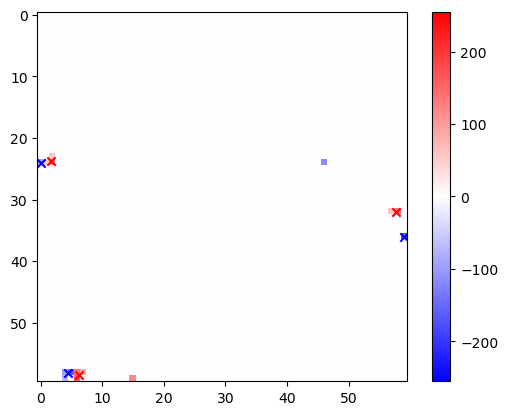

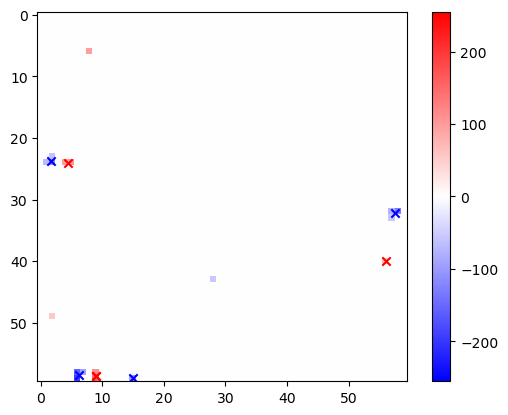

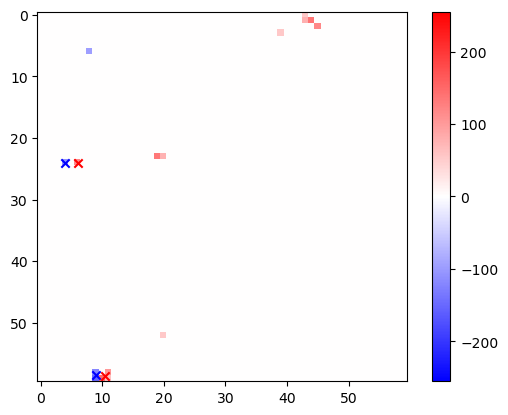

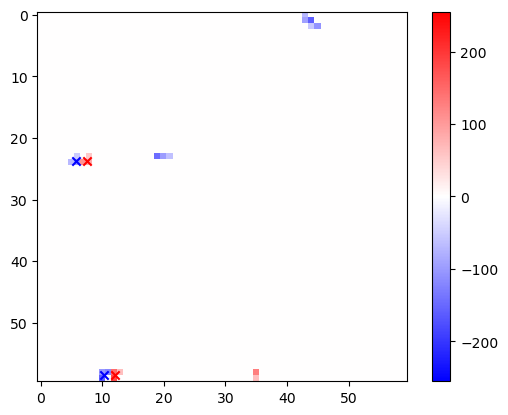

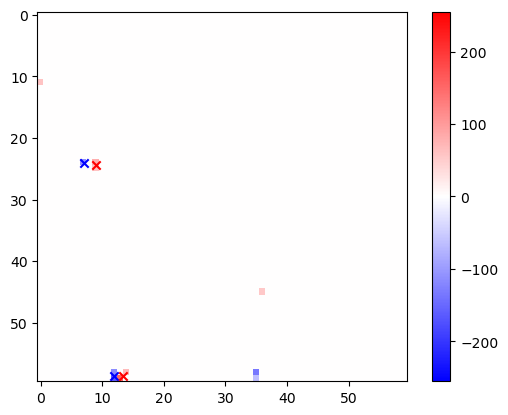

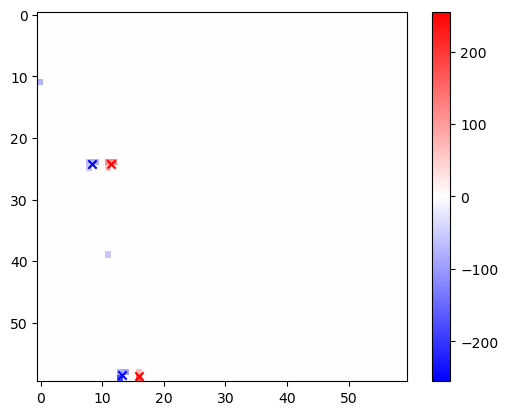

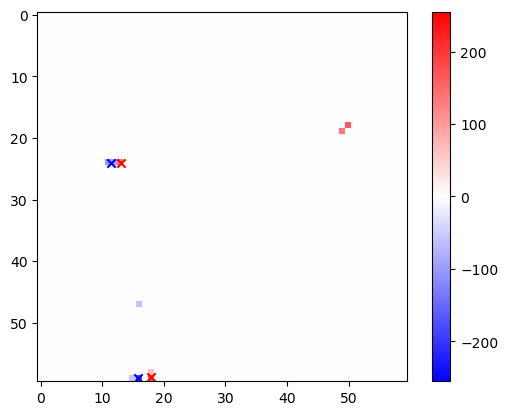

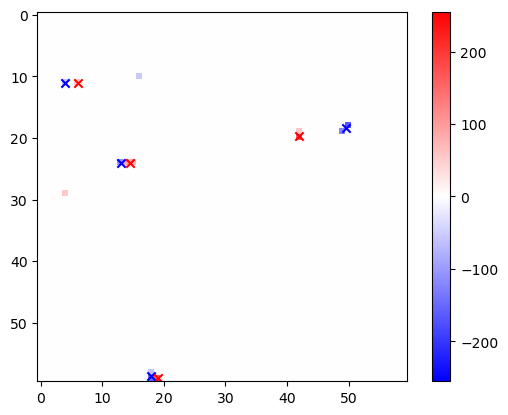

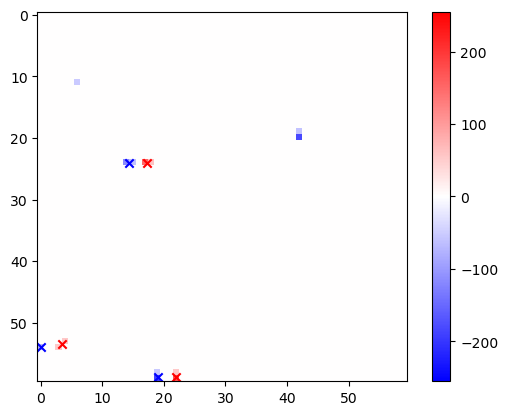

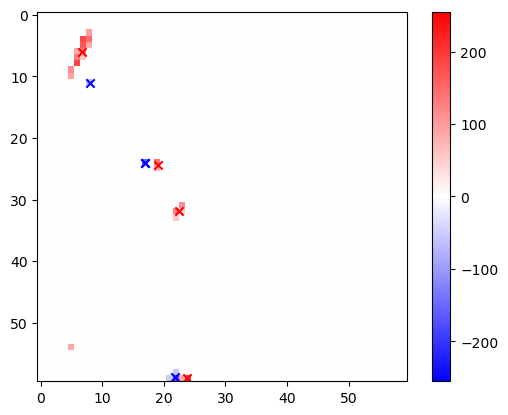

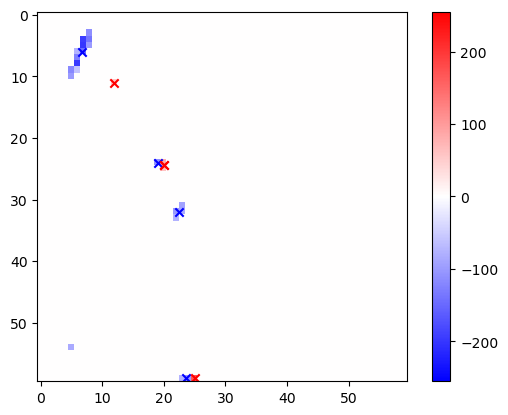

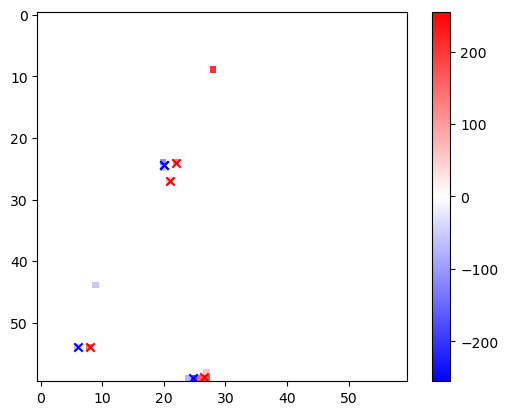

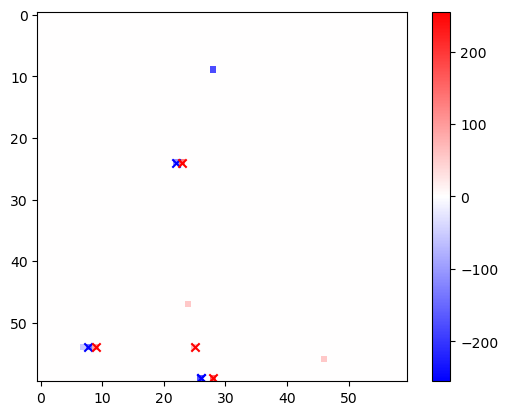

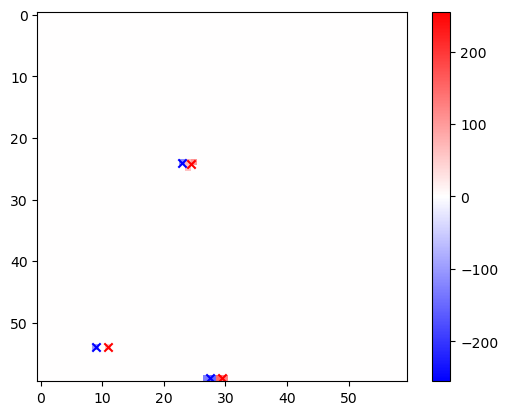

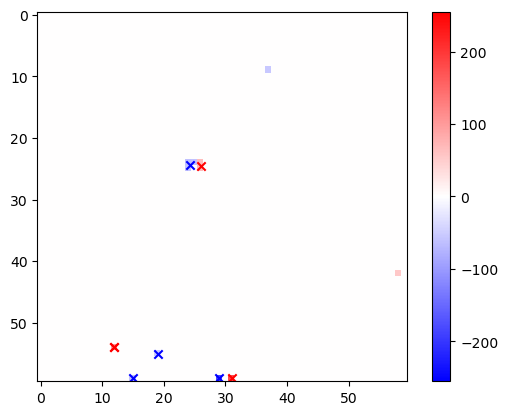

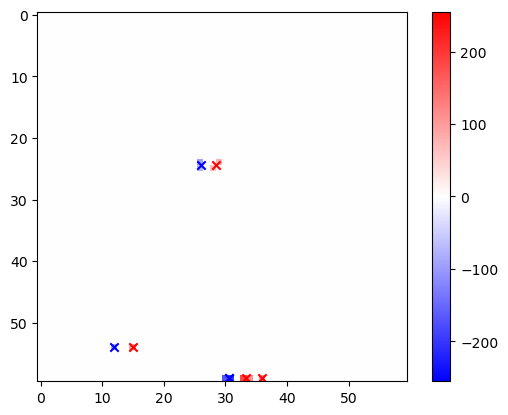

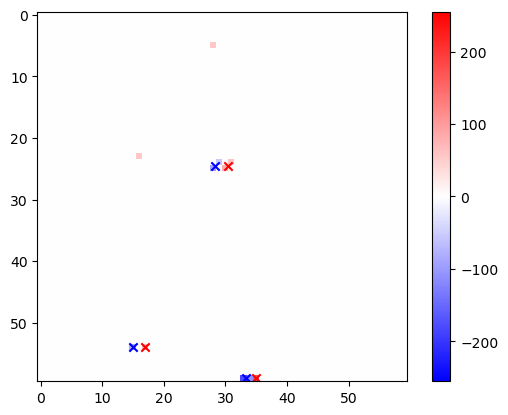

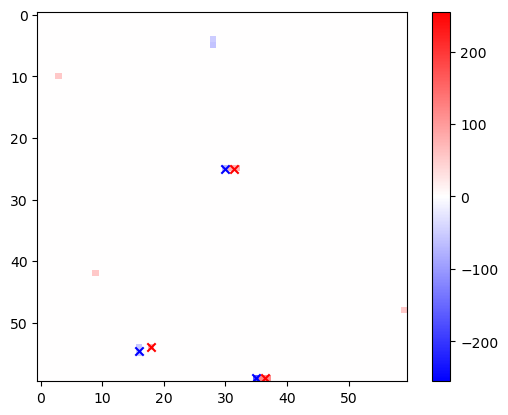

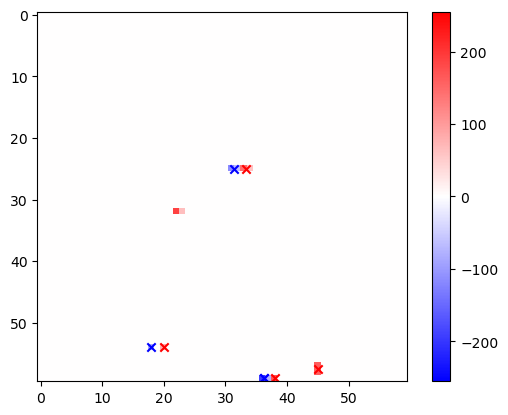

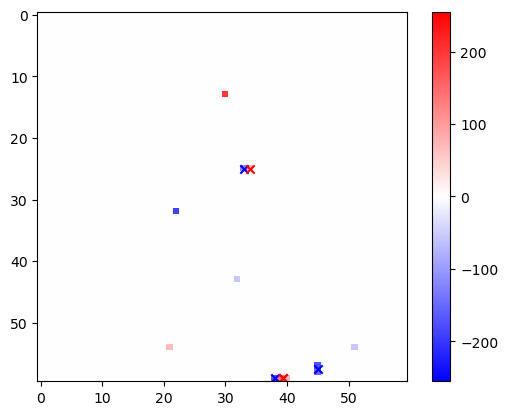

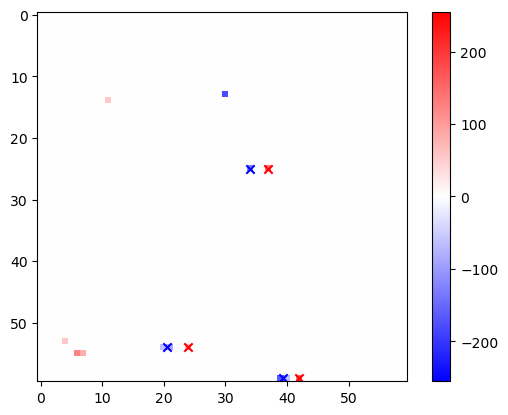

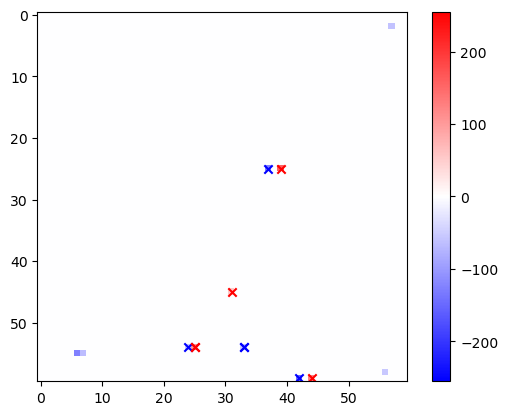

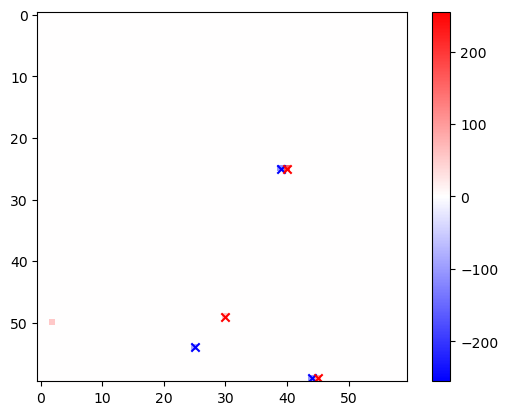

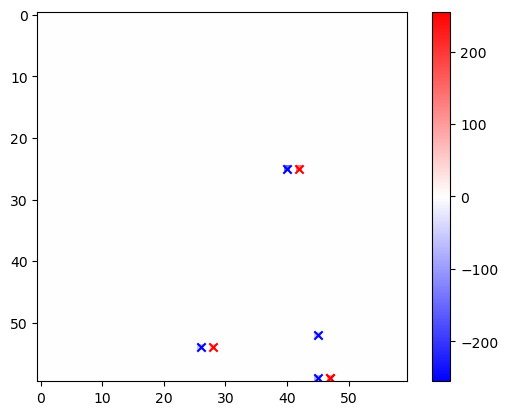

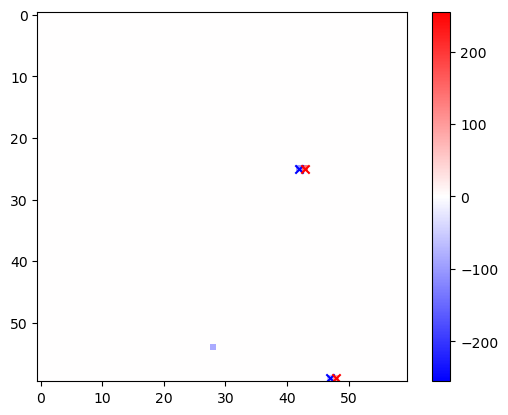

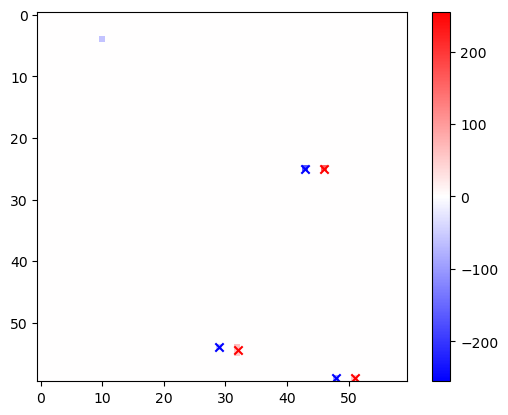

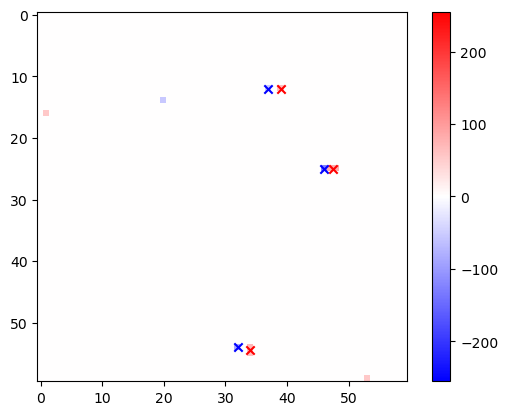

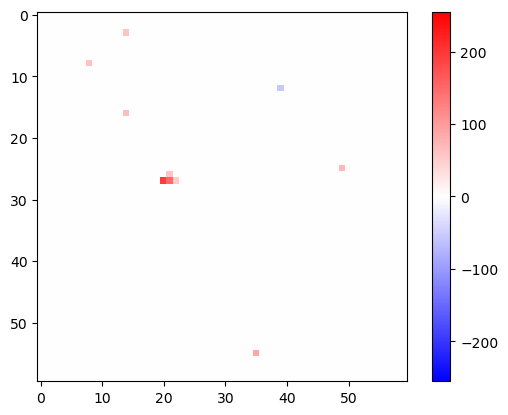

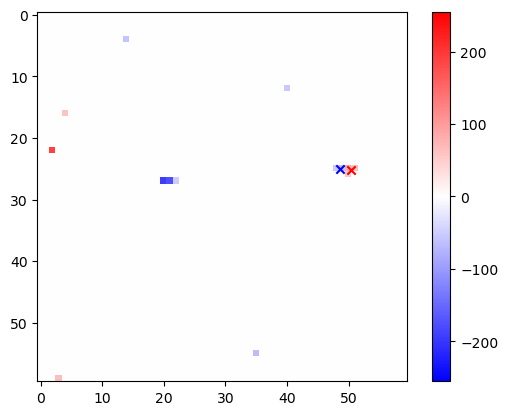

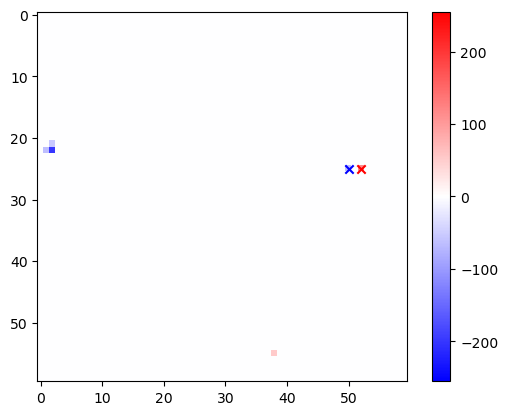

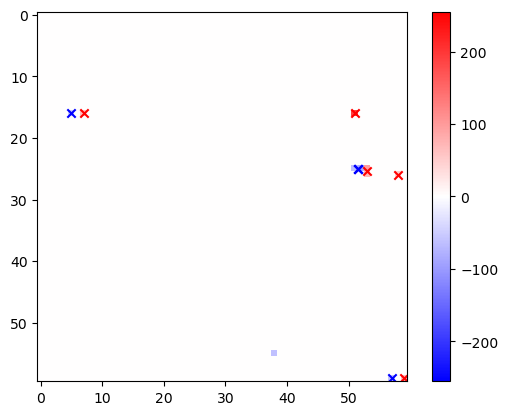

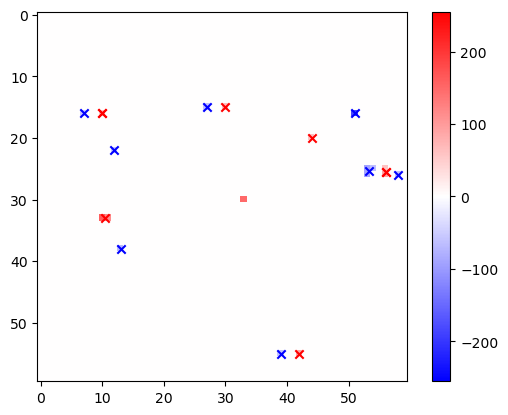

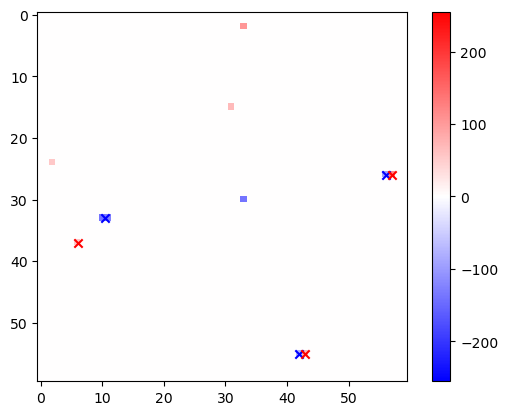

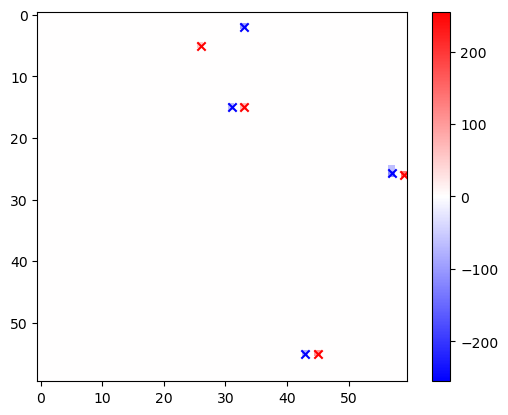

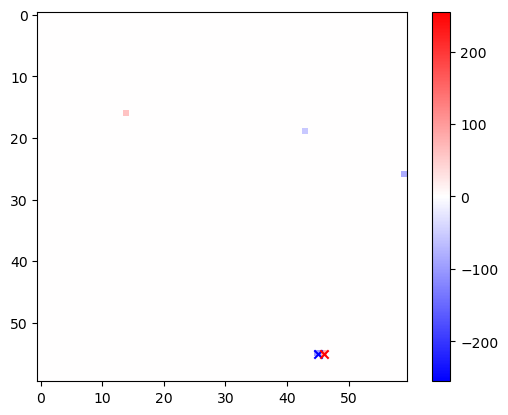

In [19]:
filename1 = "full_soho1264_070205_1718.gif"

trackedpairs=list()

for item in new_list:
    
    rgb_image1=mpimg.imread(filename1)
    image1 = rgb2gray(rgb_image1)

    rgb_image2=mpimg.imread(item)
    image2 = rgb2gray(rgb_image2)
    
    #plotblackwhite(image1)
    #plotblackwhite(image2)

    diff=np.subtract(image2,image1) # subtract image1 from image2

    #plotbwr(diff)

    #x=diff[840:900,100:160].astype(int) #zoom in
    x=diff[840:900,100:160].astype(int)
    d1=np.where(x<-50, x, 0)   # identify bright blue pixels
    d2=np.where(x>50, x, 0) # identify bright red pixels

    #plotbwr(d1+d2)

    l1, n1 = label(d1, scipy.ones((3,3)))
    l2, n2 = label(d2, scipy.ones((3,3)))

    #plotblodges(l1)
    #plotblodges(l2)

    pairs=list()

    centres1=scipy.ndimage.measurements.center_of_mass(d1,l1,range(1,n1+1))
    centres2=scipy.ndimage.measurements.center_of_mass(d2,l2,range(1,n2+1))

    for c1 in centres1:
       for c2 in centres2:
          if (c1[0]-c2[0])**2 + (c1[1]-c2[1])**2 < 10*10: # if blob is inside search radius of 10 pixels
             pairs.append((c1,c2)) # add centres to pairs list
    #print(len(pairs))

    imgplt=plt.imshow(d1+d2) # display image
    imgplt.set_clim(-255,255)
    imgplt.set_cmap("bwr")   # using gray colourscale
    plt.colorbar()  # adds a colourbar
    xs = [x[0][1] for x in pairs]
    ys = [x[0][0] for x in pairs]
    plt.scatter(xs, ys, marker='x', color='blue')
    xs_ = [x[1][1] for x in pairs]
    ys_ = [x[1][0] for x in pairs]
    plt.scatter(xs_, ys_, marker='x', color='red')
    plt.show()
    

    for x in pairs:
        trackedpairs.append((x[0][1],x[0][0]))

    filename1 = item

In [13]:
trackedpairs

[(89.43521308652605, 3.9638398622470943),
 (11.0, 37.0),
 (20.0, 38.75454545454546),
 (20.0, 38.75454545454546),
 (20.0, 38.75454545454546),
 (79.67278287461774, 51.16819571865443),
 (79.67278287461774, 51.16819571865443),
 (93.90131578947368, 54.18045112781955),
 (93.90131578947368, 54.18045112781955),
 (93.90131578947368, 54.18045112781955),
 (81.90213723284589, 3.3794525684289463),
 (29.0, 35.0),
 (12.0, 38.286384976525824),
 (12.0, 38.286384976525824),
 (28.248979591836736, 42.24081632653061),
 (72.0, 50.69230769230769),
 (86.26047358834244, 53.861566484517304),
 (86.26047358834244, 53.861566484517304),
 (91.0, 60.0),
 (88.0, 61.0),
 (91.0, 2.0),
 (88.15037593984962, 4.328947368421052),
 (19.738916256157637, 39.26108374384236),
 (55.71212121212121, 50.707070707070706),
 (55.71212121212121, 50.707070707070706),
 (79.4451219512195, 51.0),
 (79.4451219512195, 51.0),
 (95.0, 53.0),
 (95.0, 53.0),
 (95.0, 53.0),
 (93.0, 54.52068965517241),
 (93.0, 54.52068965517241),
 (93.0, 54.52068965

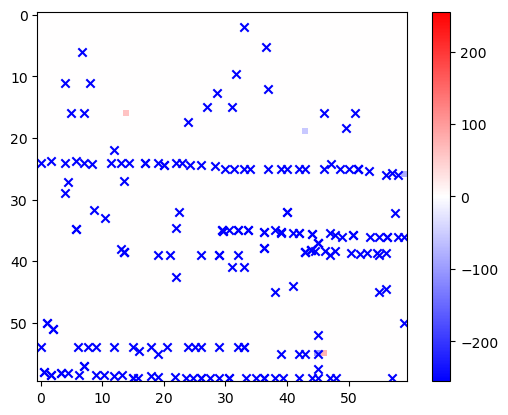

In [20]:
    imgplt=plt.imshow(d1+d2) # display image
    imgplt.set_clim(-255,255)
    imgplt.set_cmap("bwr")   # using gray colourscale
    plt.colorbar()  # adds a colourbar
    xs = [x[0] for x in trackedpairs]
    ys = [x[1] for x in trackedpairs]
    plt.scatter(xs, ys, marker='x', color='blue')
    #xs_ = [x[1][1] for x in pairs]
    #ys_ = [x[1][0] for x in pairs]
    #plt.scatter(xs_, ys_, marker='x', color='red')
    plt.show()